First, try to make the ncluster hist?

In [1]:
import uproot as ur

In [105]:
data_path = '/fast_scratch/atlas_images/v01-45/'
pi0 = ur.open(data_path+'pi0_medium.root')

In [3]:
event_branches = ["cluster_nCells", "cluster_cell_ID", "cluster_cell_E", 'cluster_nCells', "nCluster", "eventNumber",
                  "nTrack", "nTruthPart", "truthPartPdgId", "cluster_Eta", "cluster_Phi", 'trackPt', 'trackP',
                  'trackMass', 'trackEta', 'trackPhi', 'truthPartE', 'cluster_ENG_CALIB_TOT']

In [4]:
event_tree = pi0['EventTree']

In [6]:
def dict_from_event_tree(_event_tree, _branches):
    ''' The purpose for this separate function is to load np arrays where possible. '''
    _special_keys = ["nCluster", "eventNumber", "nTrack", "nTruthPart"]
    _dict = dict()
    for _key in _branches:
        if _key in _special_keys:
            _branch = _event_tree.arrays(filter_name=_key)[_key].to_numpy()
        else:
            _branch = _event_tree.arrays(filter_name=_key)[_key]
        _dict[_key] = _branch
    return _dict


In [7]:
event_dict = dict_from_event_tree(event_tree, event_branches)

In [8]:
event_dict

{'cluster_nCells': <Array [[31], [70, 31], ... [], [63, 46]] type='400000 * var * int32'>,
 'cluster_cell_ID': <Array [[[782238244, ... 778047394]]] type='400000 * var * var * int64'>,
 'cluster_cell_E': <Array [[[119, 2.26, ... 0.0127, 0.00707]]] type='400000 * var * var * float64'>,
 'nCluster': array([1, 2, 0, ..., 1, 0, 2], dtype=int32),
 'eventNumber': array([2934320, 2935402, 2935356, ..., 2933860, 2933060, 2933409]),
 'nTrack': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'nTruthPart': array([3, 3, 3, ..., 3, 3, 3], dtype=int32),
 'truthPartPdgId': <Array [[111, 22, 22], ... [111, 22, 22]] type='400000 * var * int32'>,
 'cluster_Eta': <Array [[2.66], [2.27, ... [1.9, 1.95]] type='400000 * var * float32'>,
 'cluster_Phi': <Array [[1.85], [-0.184, ... [-1.18, -1.17]] type='400000 * var * float32'>,
 'trackPt': <Array [[], [], [], [], ... [], [], [], []] type='400000 * var * float32'>,
 'trackP': <Array [[], [], [], [], ... [], [], [], []] type='400000 * var * float32'>,
 'trackMa

In [9]:
pi0_nCluster = event_dict['nCluster']

In [11]:
pipm = ur.open(data_path+'pipm_medium.root')

event_tree_pm = pipm['EventTree']
event_dict_pm = dict_from_event_tree(event_tree_pm, event_branches)

In [12]:
pipm_nCluster = event_dict_pm['nCluster']

In [14]:
import matplotlib.pyplot as plt

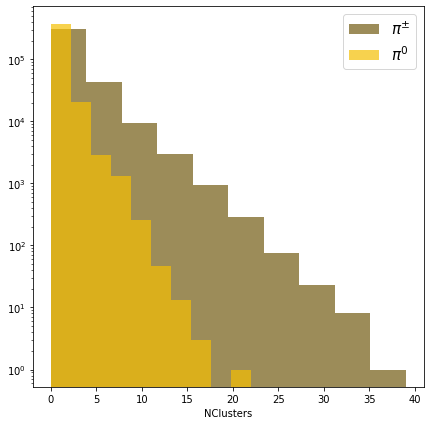

In [21]:
plt.figure(figsize=[7,7])
plt.semilogy()
plt.hist(pipm_nCluster, color='xkcd:mud', alpha=0.7, label='$\pi^{\pm}$')
plt.hist(pi0_nCluster, color='xkcd:golden', alpha=.7, label='$\pi^0$')
plt.xlabel('NClusters')
plt.legend(fontsize=15)

In [22]:
#also do for rho and delta:
rho = ur.open(data_path+'rho_medium.root')

event_tree_rho = rho['EventTree']
event_dict_rho = dict_from_event_tree(event_tree_rho, event_branches)
rho_nCluster = event_dict_rho['nCluster']

In [23]:
delta = ur.open(data_path+'delta_medium.root')

event_tree_delta = delta['EventTree']
event_dict_delta = dict_from_event_tree(event_tree_delta, event_branches)
delta_nCluster = event_dict_delta['nCluster']

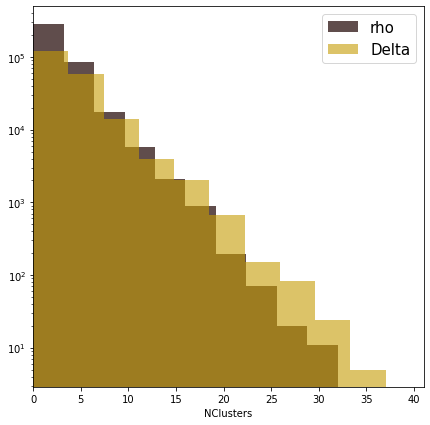

In [29]:
plt.figure(figsize=[7,7])
plt.semilogy()
plt.xlim(0,41)
plt.hist(rho_nCluster, color='xkcd:very dark brown', alpha=0.7, label='rho')
plt.hist(delta_nCluster, color='xkcd:ocre', alpha=.6, label='Delta')
plt.xlabel('NClusters')
plt.legend(fontsize=15)

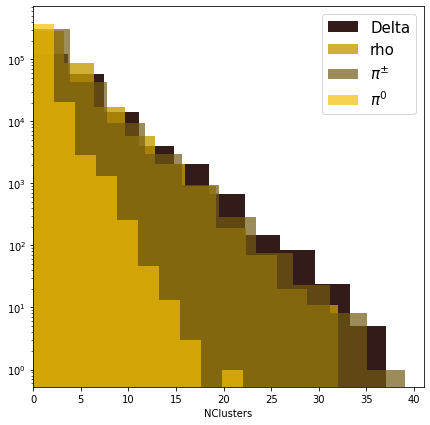

In [37]:
plt.figure(figsize=[7,7])
plt.semilogy()
plt.xlim(0,41)
plt.hist(delta_nCluster, color='xkcd:very dark brown', alpha=.9, label='Delta')
plt.hist(rho_nCluster, color='xkcd:ocre', alpha=0.8, label='rho')
plt.hist(pipm_nCluster, color='xkcd:mud', alpha=0.7, label='$\pi^{\pm}$')
plt.hist(pi0_nCluster, color='xkcd:golden', alpha=.7, label='$\pi^0$')
plt.xlabel('NClusters')
plt.legend(fontsize=15)#this is hard to make sense of....

In [39]:
#should I make some other hists? Would anything else be informative??

pi0_clusNcells = event_dict['cluster_nCells']
pipm_clusNcells = event_dict_pm['cluster_nCells']
rho_clusNcells = event_dict_rho['cluster_nCells']
delta_clusNcells = event_dict_delta['cluster_nCells']

In [46]:
#can examine how many clusters per event, and how many cells per cluster:
pi0_Nclu_per_ev = []
pipm_Nclu_per_ev = []
rho_Nclu_per_ev = []
for i in range(len(pi0_clusNcells)):
    pi0_Nclu_per_ev.append(len(pi0_clusNcells[i]))
    rho_Nclu_per_ev.append(len(rho_clusNcells[i]))

for k in range(len(pipm_clusNcells)):
    pipm_Nclu_per_ev.append(len(pipm_clusNcells[k]))
    
delta_Nclu_per_ev = []
for j in range(len(delta_clusNcells)):
    delta_Nclu_per_ev.append(len(delta_clusNcells[j]))

In [45]:
len(pi0_clusNcells), len(pipm_clusNcells)

(400000, 360000)

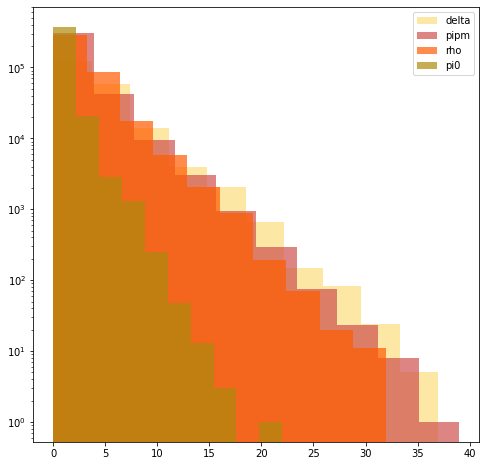

In [50]:
plt.figure(figsize=[8,8])
plt.semilogy()
plt.hist(delta_Nclu_per_ev, color='xkcd:wheat', alpha=0.7, label='delta')
plt.hist(pipm_Nclu_per_ev, color='xkcd:dark coral', alpha=.7, label='pipm')
plt.hist(rho_Nclu_per_ev, color='xkcd:bright orange', alpha=.7, label='rho')
plt.hist(pi0_Nclu_per_ev, color='xkcd:yellowy brown', alpha=.7, label='pi0')
plt.legend() #omg its identical all I did was recreate the other one omg okay on to the next step at least then:

In [52]:
import numpy as np

In [53]:
#cells per event, total:
#also do number of cells per cluster, so flatten it

pi0_Ncell_per_ev = []
pipm_Ncell_per_ev = []
rho_Ncell_per_ev = []
for i in range(len(pi0_clusNcells)):
    sum0 = np.sum(pi0_clusNcells[i])
    pi0_Ncell_per_ev.append(sum0)
    sumr = np.sum(rho_clusNcells[i])
    rho_Ncell_per_ev.append(sumr)

for k in range(len(pipm_clusNcells)):
    sump = np.sum(pipm_clusNcells[k])
    pipm_Ncell_per_ev.append(sump)
    
delta_Ncell_per_ev = []
for j in range(len(delta_clusNcells)):
    sumd = np.sum(delta_clusNcells[j])
    delta_Ncell_per_ev.append(sumd)

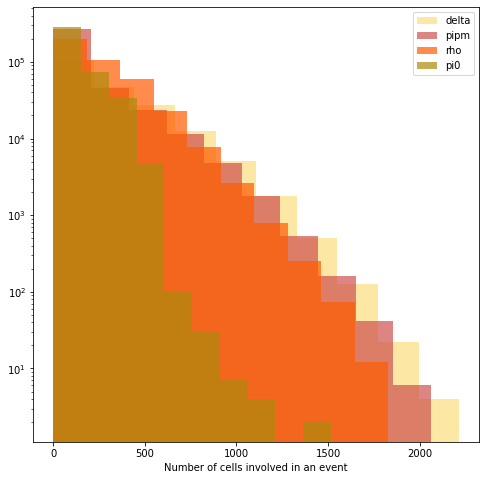

In [55]:
plt.figure(figsize=[8,8])
plt.semilogy()
plt.hist(delta_Ncell_per_ev, color='xkcd:wheat', alpha=0.7, label='delta')
plt.hist(pipm_Ncell_per_ev, color='xkcd:dark coral', alpha=.7, label='pipm')
plt.hist(rho_Ncell_per_ev, color='xkcd:bright orange', alpha=.7, label='rho')
plt.hist(pi0_Ncell_per_ev, color='xkcd:yellowy brown', alpha=.7, label='pi0')
plt.xlabel('Number of cells involved in an event')
plt.legend() #okayyy this is a bit different, now ncell per clu so have to flatten

In [56]:
#flatten cluster Ncells to get number of cells per cluster

In [59]:
b = [[89, 4], [], [34]]

np.ndarray.flatten(b)

TypeError: descriptor 'flatten' for 'numpy.ndarray' objects doesn't apply to a 'list' object

In [60]:
flattened = [item for sublist in b for item in sublist]


In [61]:
flattened

[89, 4, 34]

hmmmmmm this works..... ?

In [63]:
pi0_flat_cluNcells = [item for sublist in pi0_clusNcells for item in sublist] 

In [64]:
pipm_flat_cluNcells = [item for sublist in pipm_clusNcells for item in sublist] #fast too!!!!!
rho_flat_cluNcells = [item for sublist in rho_clusNcells for item in sublist] 
delta_flat_cluNcells = [item for sublist in delta_clusNcells for item in sublist] 

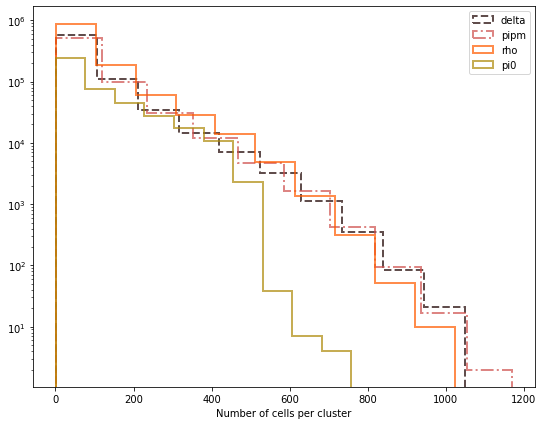

In [103]:
plt.figure(figsize=[9,7])
plt.semilogy()
plt.hist(delta_flat_cluNcells, color='xkcd:very dark brown', histtype='step', alpha=0.7, linewidth=2, ls='--', label='delta')
plt.hist(pipm_flat_cluNcells, color='xkcd:dark coral', histtype='step', ls='-.', alpha=.7, linewidth=2, label='pipm')
plt.hist(rho_flat_cluNcells, color='xkcd:bright orange', histtype='step', alpha=.7, linewidth=2, label='rho')
plt.hist(pi0_flat_cluNcells, color='xkcd:yellowy brown', histtype='step', alpha=.7, linewidth=2, label='pi0')
plt.xlabel('Number of cells per cluster')
plt.legend()

In [71]:
pi0_clusE = event_dict['cluster_ENG_CALIB_TOT']
pipm_clusE = event_dict_pm['cluster_ENG_CALIB_TOT']
rho_clusE = event_dict_rho['cluster_ENG_CALIB_TOT']
delta_clusE = event_dict_delta['cluster_ENG_CALIB_TOT']

In [72]:
#I think eng_calib_tot is the energy per cell bc it has the same dimensions as the other thing
#so I just need to flatten it again !

pi0_flat_Eng = [item for sublist in pi0_clusE for item in sublist] 
pipm_flat_Eng = [item for sublist in pipm_clusE for item in sublist] #fast too!!!!!
rho_flat_Eng = [item for sublist in rho_clusE for item in sublist] 
delta_flat_Eng = [item for sublist in delta_clusE for item in sublist] 

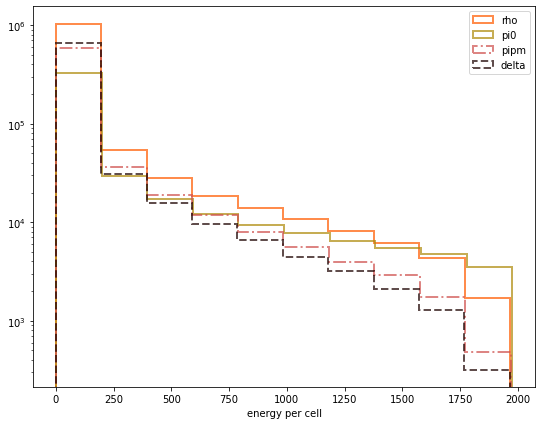

In [104]:
plt.figure(figsize=[9,7])
plt.semilogy()
plt.hist(rho_flat_Eng, color='xkcd:bright orange', alpha=.7, histtype='step',linewidth=2, label='rho')
plt.hist(pi0_flat_Eng, color='xkcd:yellowy brown', alpha=.7, histtype='step',linewidth=2, label='pi0')
plt.hist(pipm_flat_Eng, color='xkcd:dark coral', alpha=.7, histtype='step', ls='-.', linewidth=2, label='pipm')
plt.hist(delta_flat_Eng, color='xkcd:very dark brown', histtype='step', alpha=0.7, linewidth=2, ls='--', label='delta')
plt.xlabel('energy per cell')
plt.legend()

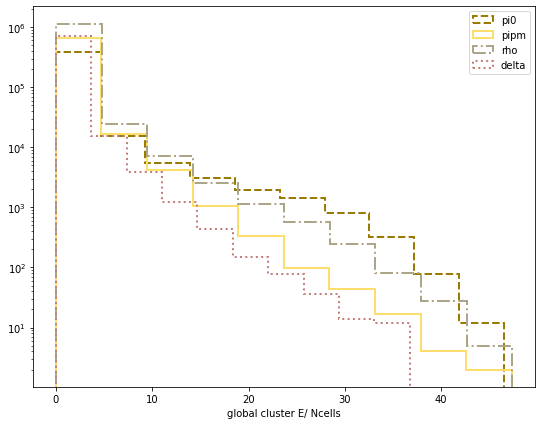

In [114]:
plt.figure(figsize=[9,7])
plt.semilogy()
plt.hist(np.array(pi0_flat_Eng)/np.array(pi0_flat_cluNcells), linewidth=2, color='xkcd:yellowish brown', histtype='step', ls='--', label='pi0')
plt.hist(np.array(pipm_flat_Eng)/np.array(pipm_flat_cluNcells), linewidth=2, color='xkcd:pale gold', histtype='step', label='pipm')
plt.hist(np.array(rho_flat_Eng)/np.array(rho_flat_cluNcells), linewidth=2, color='xkcd:stone', histtype='step', ls='-.', label='rho')
plt.hist(np.array(delta_flat_Eng)/np.array(delta_flat_cluNcells), linewidth=2, color='xkcd:brownish pink', histtype='step', ls='dotted', label='delta')
plt.xlabel('global cluster E/ Ncells')
plt.legend()

In [126]:
#define the 6 eta bins:
eta_ranges = np.arange(0., 3.1, .1)+.05

def eta_bins(eta_test):

    selec1 = abs(eta_test) < 0.5
    selec2 = (abs(eta_test) >= .5) & (abs(eta_test) < 1.)
    selec3 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.5)
    selec4 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 2.)
    selec5 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.5)
    selec6 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 3.1)

    print(len(selec1), len(selec2), len(selec3), len(selec4), len(selec5), len(selec6))
    eta_sel = [selec1, selec2, selec3, selec4, selec5, selec6]
    return eta_sel

In [132]:
pi0_eta_sel = eta_bins(np.array(pi0_flat_Eta))
pipm_eta_sel = eta_bins(np.array(pipm_flat_Eta))
rho_eta_sel = eta_bins(np.array(rho_flat_Eta))
delta_eta_sel = eta_bins(np.array(delta_flat_Eta))

421481 421481 421481 421481 421481 421481
672281 672281 672281 672281 672281 672281
1183698 1183698 1183698 1183698 1183698 1183698
740871 740871 740871 740871 740871 740871


In [137]:
np.array(pi0_flat_Eng)[(pi0_eta_sel[0])]

array([ 12.75029182,   0.        , 219.36192322, ...,  37.72893906,
       135.39042664,  20.15875816])

In [143]:
ranges = ['|$\eta$| < .5', '.5< |$\eta$| < 1.', '1.< |$\eta$| < 1.5', '1.5< |$\eta$| < 2.', '2.< |$\eta$| < 2.5', '2.5< |$\eta$| < 3.']

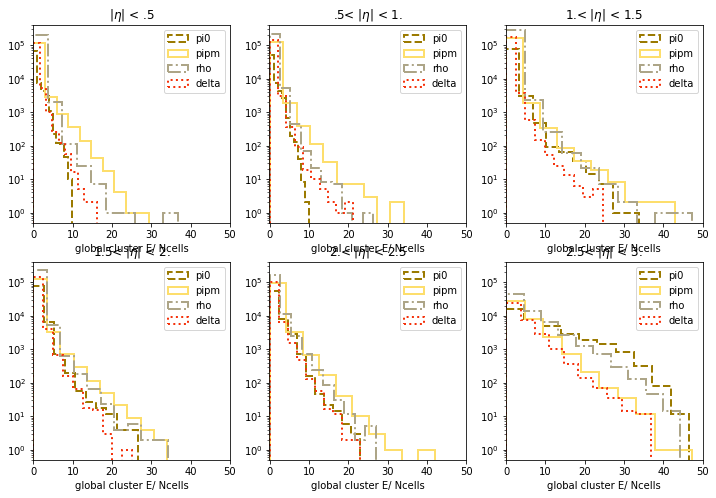

In [151]:
# then do the plots in these bins:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=[12,8])
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(axes)):
    
    axes[i].semilogy()
    axes[i].set_title(ranges[i])
    axes[i].set_xlim(-.1, 50)
    axes[i].set_ylim(.5,4e5)
    axes[i].hist(np.array(pi0_nCluster)[pi0_eta_sel[i]]/np.array(pi0_flat_cluNcells)[pi0_eta_sel[i]], linewidth=2, color='xkcd:yellowish brown', histtype='step', ls='--', label='pi0')
    axes[i].hist(np.array(pipm_flat_Eng)[pipm_eta_sel[i]]/np.array(pipm_flat_cluNcells)[pipm_eta_sel[i]], linewidth=2, color='xkcd:pale gold', histtype='step', label='pipm')
    axes[i].hist(np.array(rho_flat_Eng)[rho_eta_sel[i]]/np.array(rho_flat_cluNcells)[rho_eta_sel[i]], linewidth=2, color='xkcd:stone', histtype='step', ls='-.', label='rho')
    axes[i].hist(np.array(delta_flat_Eng)[delta_eta_sel[i]]/np.array(delta_flat_cluNcells)[delta_eta_sel[i]], linewidth=2, color='xkcd:vermillion', histtype='step', ls='dotted', label='delta')
    axes[i].set_xlabel('global cluster E/ Ncells')
    axes[i].legend()

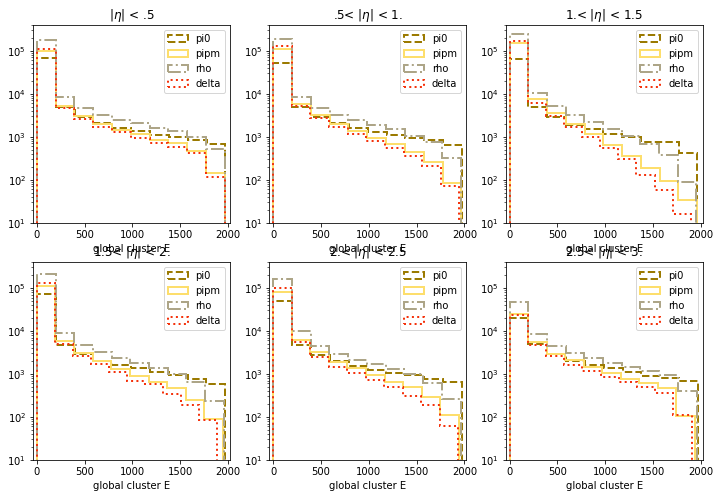

In [158]:
#just energies here
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=[12,8])
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(axes)):
    
    axes[i].semilogy()
    axes[i].set_title(ranges[i])
    axes[i].set_xlim(-40, 2020)
    axes[i].set_ylim(10,4e5)
    axes[i].hist(np.array(pi0_flat_Eng)[pi0_eta_sel[i]], linewidth=2, color='xkcd:yellowish brown', histtype='step', ls='--', label='pi0')
    axes[i].hist(np.array(pipm_flat_Eng)[pipm_eta_sel[i]], linewidth=2, color='xkcd:pale gold', histtype='step', label='pipm')
    axes[i].hist(np.array(rho_flat_Eng)[rho_eta_sel[i]], linewidth=2, color='xkcd:stone', histtype='step', ls='-.', label='rho')
    axes[i].hist(np.array(delta_flat_Eng)[delta_eta_sel[i]], linewidth=2, color='xkcd:vermillion', histtype='step', ls='dotted', label='delta')
    axes[i].set_xlabel('global cluster E')
    axes[i].legend()

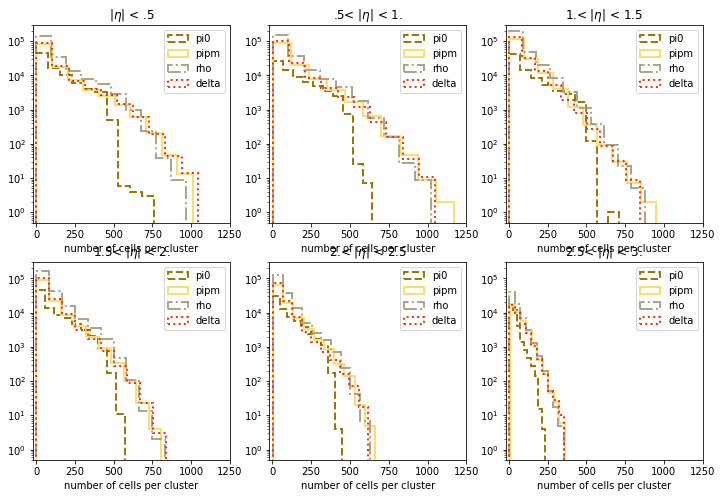

In [163]:
#just energies here
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=[12,8])
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(axes)):
    
    axes[i].semilogy()
    axes[i].set_title(ranges[i])
    axes[i].set_xlim(-20, 1250)
    axes[i].set_ylim(.5,3e5)
    axes[i].hist(np.array(pi0_flat_cluNcells)[pi0_eta_sel[i]], linewidth=2, color='xkcd:yellowish brown', histtype='step', ls='--', label='pi0')
    axes[i].hist(np.array(pipm_flat_cluNcells)[pipm_eta_sel[i]], linewidth=2, color='xkcd:pale gold', histtype='step', label='pipm')
    axes[i].hist(np.array(rho_flat_cluNcells)[rho_eta_sel[i]], linewidth=2, color='xkcd:stone', histtype='step', ls='-.', label='rho')
    axes[i].hist(np.array(delta_flat_cluNcells)[delta_eta_sel[i]], linewidth=2, color='xkcd:vermillion', histtype='step', ls='dotted', label='delta')
    axes[i].set_xlabel('number of cells per cluster')
    axes[i].legend()

In [164]:
len(pi0_nCluster)

400000

In [81]:
#okay well since I have nothing to do I'll do eta and phi next

pi0_clusEta = event_dict['cluster_Eta']
pipm_clusEta = event_dict_pm['cluster_Eta']
rho_clusEta = event_dict_rho['cluster_Eta']
delta_clusEta = event_dict_delta['cluster_Eta']

In [82]:
pi0_clusPhi = event_dict['cluster_Phi']
pipm_clusPhi = event_dict_pm['cluster_Phi']
rho_clusPhi = event_dict_rho['cluster_Phi']
delta_clusPhi = event_dict_delta['cluster_Phi']

In [83]:
pi0_flat_Eta = [item for sublist in pi0_clusEta for item in sublist] 
pipm_flat_Eta = [item for sublist in pipm_clusEta for item in sublist] #fast too!!!!!
rho_flat_Eta = [item for sublist in rho_clusEta for item in sublist] 
delta_flat_Eta = [item for sublist in delta_clusEta for item in sublist] 

pi0_flat_Phi = [item for sublist in pi0_clusPhi for item in sublist] 
pipm_flat_Phi = [item for sublist in pipm_clusPhi for item in sublist] #fast too!!!!!
rho_flat_Phi = [item for sublist in rho_clusPhi for item in sublist] 
delta_flat_Phi = [item for sublist in delta_clusPhi for item in sublist] 

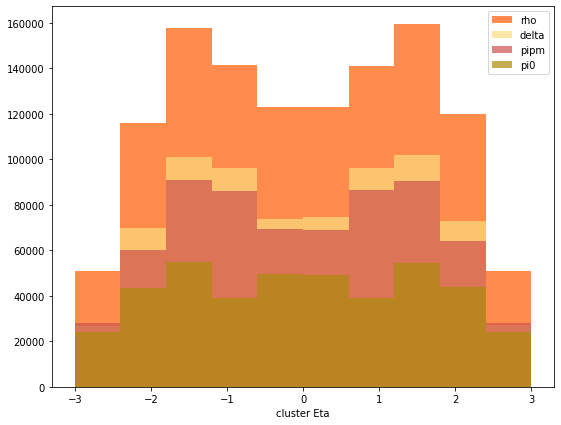

In [91]:
plt.figure(figsize=[9,7])
#plt.semilogy()
plt.hist(rho_flat_Eta, color='xkcd:bright orange', alpha=.7, label='rho')
plt.hist(delta_flat_Eta, color='xkcd:wheat', alpha=0.7, label='delta')
plt.hist(pipm_flat_Eta, color='xkcd:dark coral', alpha=.7, label='pipm')
plt.hist(pi0_flat_Eta, color='xkcd:yellowy brown', alpha=.7, label='pi0')
plt.xlabel('cluster Eta')
plt.legend()

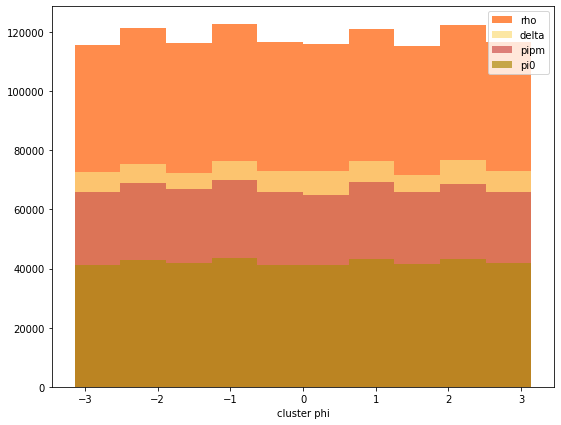

In [92]:
plt.figure(figsize=[9,7])
#plt.semilogy()
plt.hist(rho_flat_Phi, color='xkcd:bright orange', alpha=.7, label='rho')
plt.hist(delta_flat_Phi, color='xkcd:wheat', alpha=0.7, label='delta')
plt.hist(pipm_flat_Phi, color='xkcd:dark coral', alpha=.7, label='pipm')
plt.hist(pi0_flat_Phi, color='xkcd:yellowy brown', alpha=.7, label='pi0')
plt.xlabel('cluster phi')
plt.legend()